In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Business Analyst Challenge Influur.csv', index_col=0)

In [3]:
palette = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Helper funtcions

In [4]:
def change_status(row):
    if pd.notnull(row['STATUS']):
        return row['STATUS']
    elif pd.notnull(row['TXN']):
        return 'TRANSACTION'
    else:
        return 'NO_RESPONSE'

# Data Understanding and Cleaning

In [5]:
df.size

127560

In [6]:
df.describe()

,ID,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
count,12756.000000,1505.000000,1505.000000,1505.000000,3773.000000,1046.000000,1046.000000
mean,2516.923330,39.695681,14479.800664,39.663787,2009.774234,42298.432122,1.964627
std,1465.606943,5.924762,14520.262941,5.751843,10034.936766,16757.547428,1.116938
min,1.000000,30.000000,0.000000,30.000000,0.342075,11560.000000,0.000000
25%,1204.000000,35.000000,3800.000000,35.000000,67.888982,44100.000000,1.000000
50%,2571.000000,40.000000,9800.000000,40.000000,265.086727,44620.000000,2.000000
75%,3801.000000,45.000000,20100.000000,45.000000,1061.080947,53100.000000,3.000000
max,4999.000000,49.000000,108300.000000,49.000000,412498.523200,64000.000000,5.000000


In [7]:
df.head()

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,1,08:23.4,NaN,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,2,00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
12751,4999,07:42.2,NaN,NaN,NaN,NaN,NaN,31.104808,NaN,NaN
12752,4999,40:29.5,NaN,NaN,NaN,NaN,NaN,74.732791,NaN,NaN
12753,4999,22:31.7,NaN,NaN,NaN,NaN,NaN,35774.172720,NaN,NaN
12754,4999,27:19.8,NaN,NaN,NaN,NaN,NaN,79.866598,NaN,NaN
12755,4999,43:01.8,NaN,NaN,NaN,NaN,NaN,124.606009,NaN,NaN


In [9]:
df['STATUS'] = df.apply(change_status, axis=1)

In [10]:
df.head(20)

,ID,UPDATE,STATUS,MOTIVE,INTEREST_RATE,AMOUNT,CAT,TXN,CP,DELIVERY_SCORE
0,1,59:50.4,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,46:41.4,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,14:50.5,APPROVED,DIGITAL,40.0,1300.0,49.0,NaN,NaN,NaN
3,1,08:23.4,TRANSACTION,NaN,NaN,NaN,NaN,434.112066,NaN,NaN
4,2,00:00.0,NO_RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,00:00.0,NO_RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,01:07.0,RESPONSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,27:50.6,RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,49:54.2,APPROVED,PLASTIC,32.0,10000.0,39.0,NaN,NaN,NaN
9,4,00:52.7,DELIVERED,NaN,NaN,NaN,NaN,NaN,11560.0,3.0


<Axes: xlabel='COUNT', ylabel='count'>

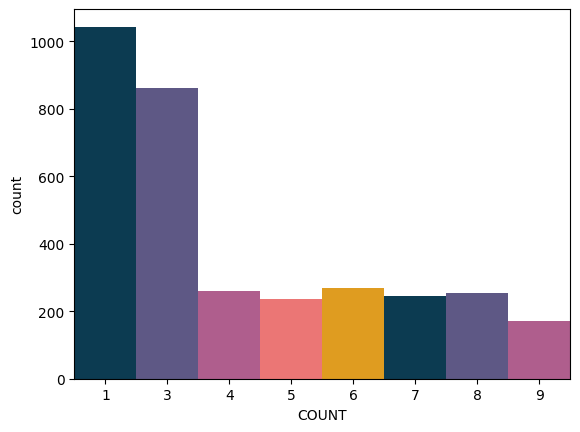

In [11]:
# Number of registers per ID
df_id = df.groupby('ID')['UPDATE'].count().reset_index()
df_id.columns = ['ID', 'COUNT']
sns.countplot(df_id, x=df_id.COUNT, palette=palette, width=1)

# ANALYSIS

## Product

In [12]:
df_card_type = df[np.logical_or(df.MOTIVE == 'PLASTIC', df.MOTIVE == 'DIGITAL' )]

df_group_number = df_card_type.groupby('MOTIVE')['ID'].count().reset_index()
df_group_number.columns = 'MOTIVE', 'COUNT'

df_group_interest = df_card_type.groupby('MOTIVE')['INTEREST_RATE'].mean().reset_index()
df_group_interest.columns = 'MOTIVE', 'INTEREST'

df_group_amount = df_card_type.groupby('MOTIVE')['AMOUNT'].mean().reset_index()
df_group_amount.columns = 'MOTIVE', 'AMOUNT'

df_card_type_trans = df[df.MOTIVE.isnull()].groupby(['ID', 'STATUS']).count().reset_index()
df_card_type_trans = df_card_type_trans[df_card_type_trans.STATUS == 'TRANSACTION'][['ID','STATUS']]
df_card_type = df[np.logical_and(df.STATUS == 'APPROVED', np.logical_or(df.MOTIVE == 'PLASTIC', df.MOTIVE == 'DIGITAL'))][['ID', 'MOTIVE']]
df_card_type_trans_id = df_card_type_trans.merge(df_card_type, how='inner', on='ID')
df_card_type_trans_id = df_card_type_trans_id.groupby('MOTIVE')['ID'].count().reset_index()
df_card_type_trans_id.columns = ['MOTIVE', 'TRANSACTIONS']

df_card_trans_amount = df[df.STATUS == 'TRANSACTION'][['ID','TXN']]
df_card_type_trans_amount_type = df_card_trans_amount.merge(df_card_type, how='inner', on='ID')
df_card_type_trans_amount_avg = df_card_type_trans_amount_type.groupby('MOTIVE')['TXN'].mean().reset_index()

df_card_trans_cost = df[df.STATUS == 'APPROVED'][['ID','CAT']]
df_card_type_cost_amount = df_card_trans_cost.merge(df_card_type, how='inner', on='ID')
df_card_type_cost_amount_avg = df_card_type_cost_amount.groupby('MOTIVE')['CAT'].mean().reset_index()
df_card_type_cost_amount_sum = df_card_type_cost_amount.groupby('MOTIVE')['CAT'].sum().reset_index()

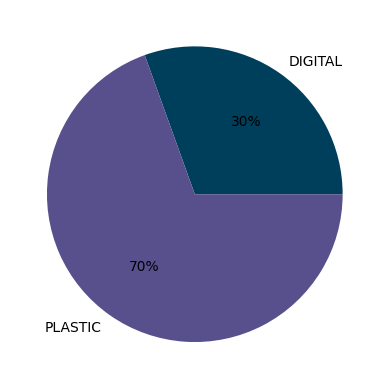

In [13]:
# Number of cards digital vs plastic
plt.pie(df_group_number.COUNT, labels=df_group_number.MOTIVE, colors=palette, autopct='%.0f%%')
plt.show()

[Text(0, 0, '391'), Text(0, 0, '864')]

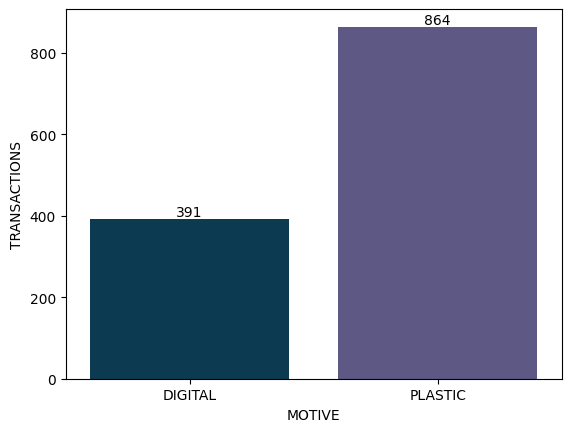

In [14]:
# Number of transactions done by each type of card
ax = sns.barplot(df_card_type_trans_id, x=df_card_type_trans_id.MOTIVE, y=df_card_type_trans_id.TRANSACTIONS, palette=palette)
ax.bar_label(ax.containers[0])

[Text(0, 0, '2022.5'), Text(0, 0, '2004')]

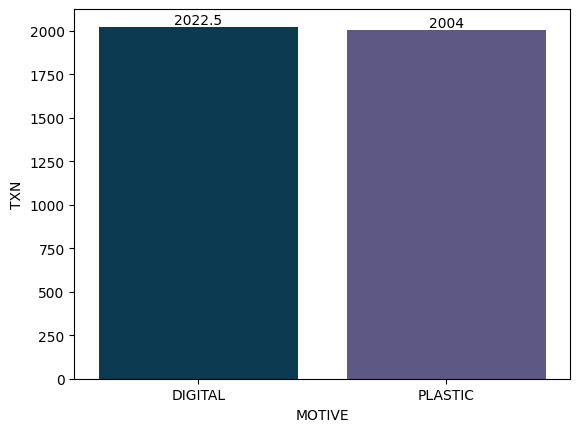

In [15]:
# Average transaction amount per card type
ax = sns.barplot(df_card_type_trans_amount_avg, x=df_card_type_trans_amount_avg.MOTIVE, y=df_card_type_trans_amount_avg.TXN, palette=palette)
ax.bar_label(ax.containers[0])

In [16]:
# Average anual cost of each card type
df_card_type_trans_amount_avg

,MOTIVE,TXN
0,DIGITAL,2022.499975
1,PLASTIC,2003.997385


[Text(0, 0, '39.3246'), Text(0, 0, '39.8126')]

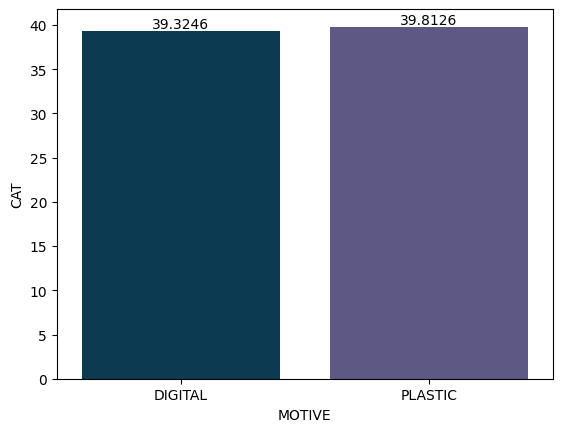

In [31]:
# Anual card cost for each type
ax = sns.barplot(df_card_type_cost_amount_avg, x=df_card_type_cost_amount_avg.MOTIVE, y=df_card_type_cost_amount_avg.CAT, palette=palette)
ax.bar_label(ax.containers[0])

#### df_card_type_cost_amount_avg

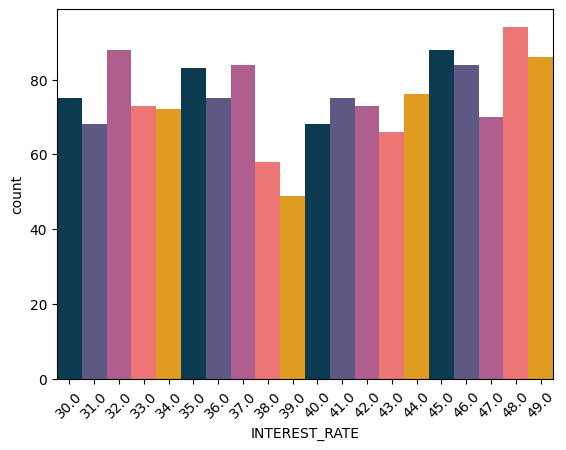

In [18]:
# Interest rate distributution
ax = sns.countplot(data=df, x='INTEREST_RATE', palette=palette, width=1)
ax.tick_params(axis='x', labelrotation=45)

## Customer service

In [19]:
df[pd.notnull(df['DELIVERY_SCORE'])].DELIVERY_SCORE.mean()

1.9646271510516253

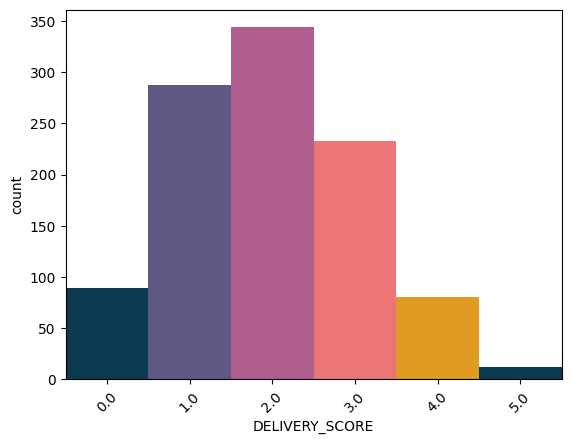

In [20]:
# Delivery score distribution
ax = sns.countplot(data=df, x='DELIVERY_SCORE', palette=palette, width=1)
ax.tick_params(axis='x', labelrotation=45)

## Marketing

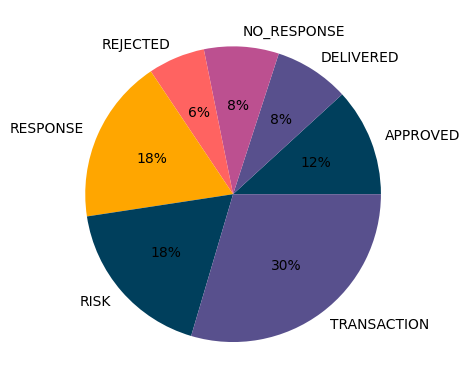

In [21]:
# Status distribution
status_count = df.groupby('STATUS')['ID'].count().reset_index()
plt.pie(status_count.ID,labels=status_count.STATUS, colors=palette, autopct='%.0f%%')
plt.show()

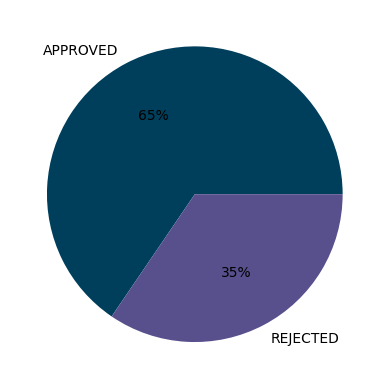

In [22]:
# approved/Rejection rate
approved_rate = df[np.logical_or(df['STATUS'] == 'REJECTED',df['STATUS'] == 'APPROVED')].groupby('STATUS')['ID'].count().reset_index()
plt.pie(approved_rate.ID,labels=approved_rate.STATUS, colors=palette, autopct='%.0f%%')
plt.show()

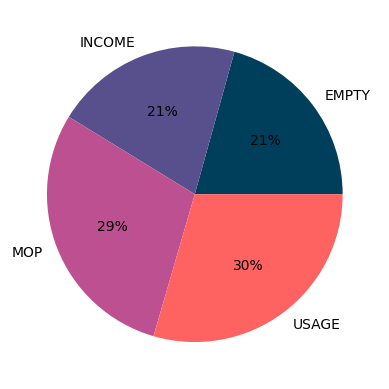

In [23]:
#Rejection motive
rejected_motive = df[df['STATUS'] == 'REJECTED'].groupby('MOTIVE')['ID'].count().reset_index()
palette = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
plt.pie(rejected_motive.ID,labels=rejected_motive.MOTIVE, colors=palette, autopct='%.0f%%')
plt.show()

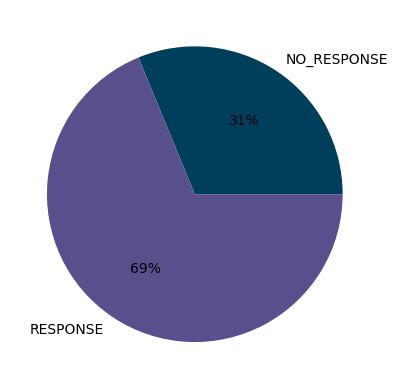

In [24]:
# respose/no response rate
approved_rate = df[np.logical_or(df['STATUS'] == 'RESPONSE',df['STATUS'] == 'NO_RESPONSE')].groupby('STATUS')['ID'].count().reset_index()
plt.pie(approved_rate.ID,labels=approved_rate.STATUS, colors=palette, autopct='%.0f%%')
plt.show()

/Users/mariadelrosarioleon/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


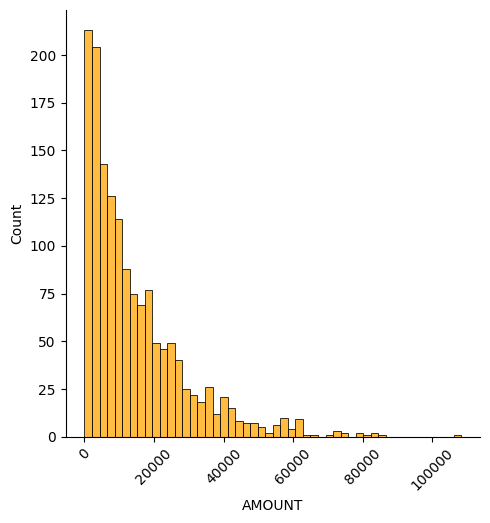

In [32]:
# Transaction value distribution
ax = sns.displot(data=df, x='AMOUNT', color='#ffa600', bins=50)
ax.tick_params(axis='x', labelrotation=45)

### 